# Qiskit 설치 및 업데이트

최신 버젼의 Qiskit을 설치하는 것! 헷갈리신다면 다음의 순서를 따라해보세요 

1. [아나콘다 설치](https://www.anaconda.com/)

    1-1. 만약 오래된 아나콘다가 설치되어 있다면 터미널을 열어 다음의 명령어를 실행해 보세요

    `conda update -n base conda`
    
2. 환경 만들기

    `conda create -n qiskit python=3.10`

3. 쥬피터 노트북 혹은 쥬피터 랩 설치

    `conda install jupyter notebook` 혹은 `conda install jupyterlab`

4.  Qiskit 설치 및 업데이트

    `pip install qiskit` 및 `pip install -U qiskit`

5. qiskit_ibm_provider 설치

    `pip install qiskit qiskit_ibm_provider`

6. qiskit-ibm-runtime 설치

    `pip install qiskit-ibm-runtime`

7. qiskit-aer 설치

    `pip install qiskit-aer`

8.  (Option) Qiskit visualization tool 설치

- `bash`: `pip install qiskit[visualization]`

- `zsh`: `pip install 'qiskit[visualization]'`

설치가 잘 되었는지 다음의 명령어를 실행해서 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

# Qiskit Update Highlighs (9월 14일자 업데이트)

## Qiskit 0.44 주요 업데이트 사항

- `qiskit-ibmq-provider` 패키지(`qiskit.providers.ibmq`)의 공식적인 지원이 종료되었습니다. `qiskit-ibm-provider`, `qiskit-ibm-experiment`, 그리고 `qiskit-ibm-runtime`로 대체하세요. 대체 코드 예제는 하단 참조. <https://github.com/Qiskit/qiskit-ibmq-provider#migration-guides>
  
- `qiskit-aer`가 Qiskit metapackage에서 분리되었습니다. 따라서 qiskit 설치 시 `qiskit-aer`를 추가로 설치해야하고 `qiskit_aer`를 import 해야 합니다.
  
- 현재 버전이 Qiskit metapackage의 마지막 릴리즈이기 때문에, 다음 버전(0.45.0)에서 선택적 의존성(dependency) 설치를 위한 다음의 setuptools extra가 작동하지 않습니다:
  - `nature`
  - `machine-learning`
  - `finance`
  - `optimization`
  - `experiments` 

  예시로, `pip install qiskit[experiments]` 대신 `pip install qiskit qiskit-experiments`를 사용하여 `qiskit`과 `qiskit-experiments` 패키지를 설치하세요. 
  
  마찬가지로 `all` extra (i.e. `pip install "qiskit[all]"`) 또한 위 패키지들을 설치하지 않습니다.
  
- 이로 인해 Qiskit metapackage에는 `qiskit-terra`만 남게 됩니다. 따라서 다음 버전(0.45.0)부터는 이 둘을 구분하지 않습니다. 따라서 Qiskit metapackage의 버전을 알려주던 `qiskit.__qiskit_version__`이 더이상 필요하지 않게 되어 `qiskit.__version__`으로 대체되었습니다.

- Transpiler가 [Dynamic Circuit (Control flow)](https://qiskit.org/documentation/apidoc/circuit.html#control-flow-operations)를 모든 optimization level에서 지원됩니다. 예를 들어, [`transpile()`](https://qiskit.org/documentation/apidoc/compiler.html#qiskit.compiler.transpile)과 [`generate_preset_pass_manager()`](https://qiskit.org/documentation/apidoc/transpiler_preset.html#qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager)에서 `optimization_level` 키워드를 2 또는 3으로 설정하는 것을 지원합니다.

- [`IfElseOP.condition`, `WhileLoopOp.condition`, `SwitchCaseOp.target`](https://qiskit.org/documentation/apidoc/circuit.html#control-flow-operations) 필드가 새로운 classical-expression 타입인 [`expr.Expr`](https://qiskit.org/documentation/apidoc/circuit_classical.html#qiskit.circuit.classical.expr.Expr) 객체를 받을 수 있습니다. 이는 classical condition을 적용하는데 기존의 튜플 방식(i.e., `(ClassicalRegister | Clbit, int)`)보다 훨신 나은 방식입니다. 예를 들어, 서로 다른 두개의 `ClassicalRegister`의 동치 조건이나 classical bit끼리의 논리 OR를 표현할 수 있습니다. 예제는 하단 및 [`qiskit.circuit.classical`](https://qiskit.org/documentation/apidoc/circuit_classical.html#module-qiskit.circuit.classical)을 참조하세요.

  이 초기 릴리즈에서 아래 연산이 추가되었습니다 (아직 IBM 백엔드에서 지원하지 않는 연산도 있음):
  - `bit_not()`
  - `logic_not()`
  - `bit_and()`
  - `bit_or()`
  - `bit_xor()`
  - `logic_and()`
  - `logic_or()`
  - `equal()`
  - `not_equal()`
  - `less()`
  - `less_equal()`
  - `greater()`
  - `greater_equal()`
  
  Python `int`와 `bool` 리터럴과 Qiskit `ClassicalRegister`, `Clbit` 객체를 받습니다. ([doc](https://qiskit.org/documentation/apidoc/circuit_classical.html#construction))

  모든 Classical expression은 Qiskit transpiler 스텍과 QPY 병렬화([`qiskit.qpy`](https://qiskit.org/documentation/apidoc/qpy.html#module-qiskit.qpy)), 그리고 OpenQASM3([`qiskit.qasm3`](https://qiskit.org/documentation/apidoc/qasm3.html#module-qiskit.qasm3)) 추출을 지원합니다.

- 이제 `QuantumCircuit.draw`가 `mpl`로 그릴 때 Control flow를 더 잘 표현합니다.

- [논문](https://arxiv.org/abs/2210.16195)을 기반으로 하는 새로운 linear nearest neighbor connectivity (LNN) synthesis algorithm이 추가되었습니다. 이 알고리즘은 LNN 연결성을 가정한 CX-CZ 양자회로를 위한 것으로, `.synth_clifford_depth_lnn()`의 기본 합성 방식으로 채택되었습니다. 이로서 Clifford 분해의 깊이가 $9n+4$에서 $7n+2$로 감소하였습니다. 
  
- 양자회로 변수대입과 `ConsolidateBlocks`의 성능이 비약적으로 향상되었습니다. 
  
  `QuantumCircuit.assign_parameters`와 `QuantumCircuit.bind_parameters`가 application development 등의 특정 작업에서 훨신 빨라졌습니다. 또한, `QuantumCircuit.assign_parameters`에 `Dict` 형식의 매개변수를 사용하는 경우 `flat_input`과 `strict` 키워드를 사용하여 성능을 향상시킬 수 있습니다. <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.assign_parameters>

  아래 이미지는 `EffectiveSU2` 매개변수 양자회로 클래스를 통해 `transpile()`의 성능을 기존과 비교한 결과입니다.
  ![nn](1*5T7rRRtO7GzXgYiNqUI3pw.webp)

  `ConsolidateBlocks` transpiler pass가 내부적으로 재조정됨에 따라 transpile 시간이 단축되었습니다. 사용자의 코드를 변경시키지 않아도 `.transpile(optimization_level=3)`의 성능 향상을 체감할 수 있습니다.

- [`qiskit.algorithm`](https://qiskit.org/documentation/apidoc/algorithms.html#module-qiskit.algorithms) 모듈이 다음 릴리즈에 제거됩니다. 독립적인 라이브러리인 [`qiskit-algorithm`](https://github.com/qiskit-community/qiskit-algorithms)로 대체하세요. (<https://qisk.it/algo_migration> 참조)

- (~Qiskit Terra 0.23) 2023년 6월 27일에 종료되는 Python 3.7을 지원하지 않습니다. 더 높은 버전의 Python을 사용하세요.

## 예제 코드

### `qiskit-ibmq-provider` migration guide

기존 방식의 코드는 다음과 같습니다.

```python
from qiskit import IBMQ

# 저장 없이 IBM Quantum 계정 활성화.
IBMQ.enable_account(token=MY_API_TOKEN)

# 계정 토큰(증명서) 저장.
IBMQ.save_account(token=MY_API_TOKEN)

# 계정 불러오기.
provider = IBMQ.load_account()

# hub/group/project 선택하여 불러오기.
provider = IBMQ.get_provider(hub="ibm-q-yonsei", group="externalq-meetup", project="tutorials")
```

새로운 방식의 코드는 다음과 같습니다.

In [2]:
from qiskit_ibm_provider import IBMProvider

# 저장 없이 IBM Quantum 계정 활성화.
# IBMProvider.enable_account(token=MY_API_TOKEN)

# 계정 토큰(증명서) 저장.
# IBMProvider.save_account(token=MY_API_TOKEN)

# 계정 불러오기.
# provider = IBMProvider()

# hub/group/project 선택하여 불러오기.
# provider = IBMProvider(instance="ibm-q-yonsei/externalq-meetup/tutorials")
# provider = IBMProvider(instance="ibm-q-internal/deployed/default")
provider = IBMProvider(instance="ibm-q/open/main")

In [3]:
#밋업 참가자들에게 제공되는 양자 백엔드 목록
provider.backends(filters=lambda x: 'simulator' not in x.name)

[<IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_lagos')>]

### Initial Support for Classical Expressions: `expr.Expr`

새로운 classical expression은 `ParameterExpression` 과 다르게 지원되는 backend에서 *runtime*으로 실행됩니다. 간단한 예제 코드는 다음과 같습니다.

In [4]:
from qiskit.circuit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.classical import expr

qr = QuantumRegister(4)
cr1 = ClassicalRegister(2)
cr2 = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr1, cr2)
qc.h(0)
qc.cx(0, 1)
qc.h(2)
qc.cx(2, 3)
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# 기존 방식
with qc.if_test((cr1, 3)) as else_:
  qc.x(0)
with else_:
  qc.y(1)

# 문제점: 아래 Control flow를 표현하기는 어려움.

# 새로운 방식
# 두 레지스터가 같은지 확인
with qc.if_test(expr.equal(cr1, cr2)) as else_:
  qc.h(0)
with else_:
  qc.s(1)

# 두 비트중 하나라도 1이면 반복
with qc.while_loop(expr.logic_or(cr1[0], cr1[1])):
  qc.reset(0)
  qc.reset(1)
  qc.measure([0, 1], cr1)

### Additional support for Dynamic Circuits in the Transpiler & OpenQASM3

Qiskit 0.39에서부터 optimization level 0, 1에 대한 control flow를 지원했습니다. 새로운 릴리즈에서 이것이 optimization level 2, 3으로 확대되었습니다.

In [5]:
from qiskit import transpile
from qiskit.circuit import IfElseOp, WhileLoopOp, SwitchCaseOp

backend = provider.get_backend('ibm_perth')
# backend.target.add_instruction(SwitchCaseOp, name="switch_case")
# backend.target.add_instruction(IfElseOp, name="if_else")
backend.target.add_instruction(WhileLoopOp, name="while_loop")
compiled_qc = transpile(qc, backend, optimization_level=3)

/Users/shaun/anaconda3/envs/qiskit/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/shaun/anaconda3/envs/qiskit/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


또한 Dynamic circuit을 OpenQASM3 형식으로 추출할 수 있습니다.

In [9]:
from qiskit.qasm3 import dumps

print(dumps(compiled_qc))

OPENQASM 3;
include "stdgates.inc";
bit[2] c0;
bit[2] c1;
rz(pi/2) $3;
sx $3;
rz(pi/2) $3;
cx $3, $1;
rz(pi/2) $6;
sx $6;
rz(pi/2) $6;
cx $6, $5;
c0[0] = measure $6;
c0[1] = measure $5;
if (c0 == 3) {
  x $6;
} else {
  rz(pi) $5;
  x $5;
}
c1[0] = measure $3;
c1[1] = measure $1;
if (c0 == c1) {
  rz(pi/2) $6;
  sx $6;
  rz(pi/2) $6;
} else {
  rz(pi/2) $5;
}
while (c0[0] || c0[1]) {
  reset $6;
  reset $5;
  c0[0] = measure $6;
  c0[1] = measure $5;
}



### Control Flow Representation for the mpl Circuit Drawer

기존 Control flow를 표현하는 방식은 아래 코드에 나온 것처럼 직관적이지 않았습니다.

In [6]:
qc.draw()

┌───┐     ┌─┐         ┌──────────┐┌──────────┐┌─────────────┐
q0_0: ┤ H ├──■──┤M├─────────┤0         ├┤0         ├┤0            ├
      └───┘┌─┴─┐└╥┘┌─┐      │          ││          ││             │
q0_1: ─────┤ X ├─╫─┤M├──────┤1         ├┤1         ├┤1            ├
      ┌───┐└───┘ ║ └╥┘┌─┐   │          ││          ││             │
q0_2: ┤ H ├──■───╫──╫─┤M├───┤          ├┤          ├┤             ├
      └───┘┌─┴─┐ ║  ║ └╥┘┌─┐│  If_else ││          ││  While_loop │
q0_3: ─────┤ X ├─╫──╫──╫─┤M├┤          ├┤          ├┤             ├
           └───┘ ║  ║  ║ └╥┘│          ││  If_else ││             │
c0_0: ═══════════╩══╬══╬══╬═╡0         ╞╡1         ╞╡0            ╞
                    ║  ║  ║ │          ││          ││             │
c0_1: ══════════════╩══╬══╬═╡1         ╞╡0         ╞╡1            ╞
                       ║  ║ └──────────┘│          │└─────────────┘
c1_0: ═════════════════╩══╬═════════════╡2         ╞═══════════════
                          ║             │          │               
c1_1: ════════════════════╩═════════════╡3         ╞═══════════════
                                        └──────────┘

하지만 `mpl`(Matplotlib)에 대한 새로운 표현 방식을 지원하여 더 직관적으로 Control flow를 표현할 수 있습니다.

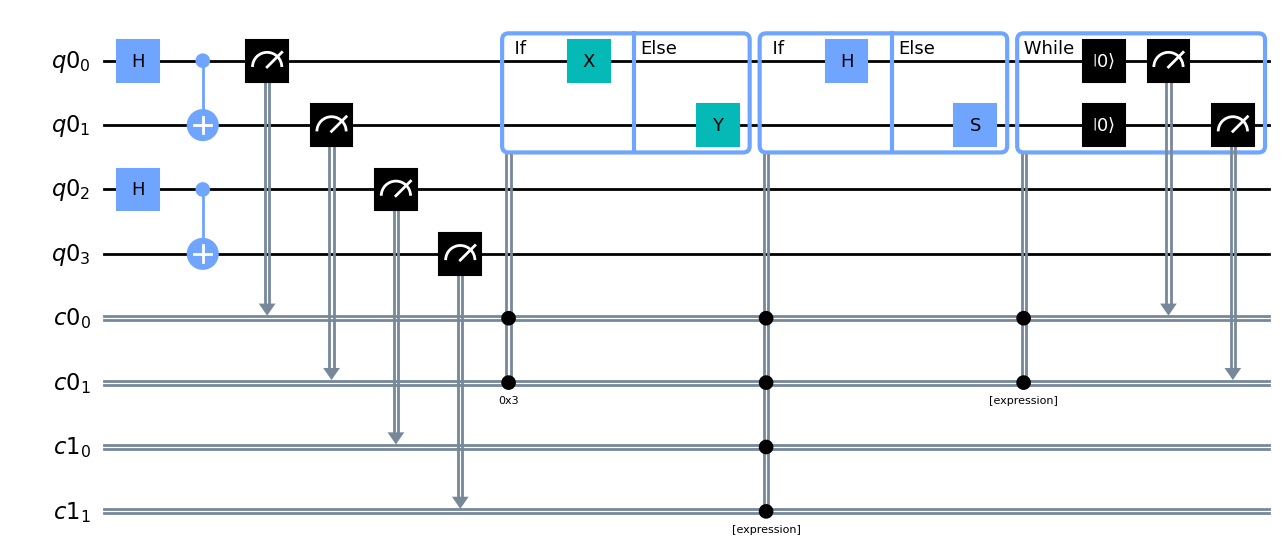

In [7]:
qc.draw('mpl')

### New Synthesis Algorithm

CX-회로를 나타내는 binary invertible 행렬 `mat_x`와 CZ-회로를 나타내는 binary symmetric 행렬 `mat_z`를 사용하여 앞서 설명한 합성 알고리즘을 초기화할 수 있습니다.

In [8]:
import numpy as np
from qiskit.synthesis.linear_phase import synth_cx_cz_depth_line_my

mat_x = np.array([[0, 1], [1, 1]])
mat_z = np.array([[0, 1], [1, 0]])
qc = synth_cx_cz_depth_line_my(mat_x, mat_z)

# Qiskit Global 커뮤니티는 2주에 한번씩, 개발자 밋업을 개최하고 있습니다.

- Repo: <https://github.com/Qiskit/feedback/wiki/Qiskit-DemoDays>
- Tutorial Notebook: <https://github.com/Qiskit/feedback/tree/main/demo-day-notebooks>
- Release Note: <https://qiskit.org/documentation/release_notes.html>

감사합니다!